In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

np.random.seed(47)
plt.style.use('dark_background')

# Parameters
lambda_value = 2  # Rate parameter for the exponential distribution
n = 5             # Number of independent exponential variables
num_samples = 100000  # Number of samples to simulate

class ExponentialDistribution:
    """
    Exponential distribution with parameterized rate.
    """
    def __init__(self, rate):
        self.rate = rate
        self.scale = 1 / rate  # Scale is the inverse of the rate

    def rvs(self, num_samples):
        return expon(scale=self.scale).rvs(size=num_samples)

    def pdf(self, x):
        return expon(scale=self.scale).pdf(x)

# Create ExponentialDistribution instances (theoretical)
exp_dist = ExponentialDistribution(rate=lambda_value)
exp_X_1_dist = ExponentialDistribution(rate=n*lambda_value)

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_21104/1686085730.py:17: SyntaxWarning: invalid escape sequence '\s'
  label="PDF of $X \sim \exp(\lambda)$",
/tmp/ipykernel_21104/1686085730.py:20: SyntaxWarning: invalid escape sequence '\s'
  label="PDF of $X(1) \sim \exp(n\lambda)$",


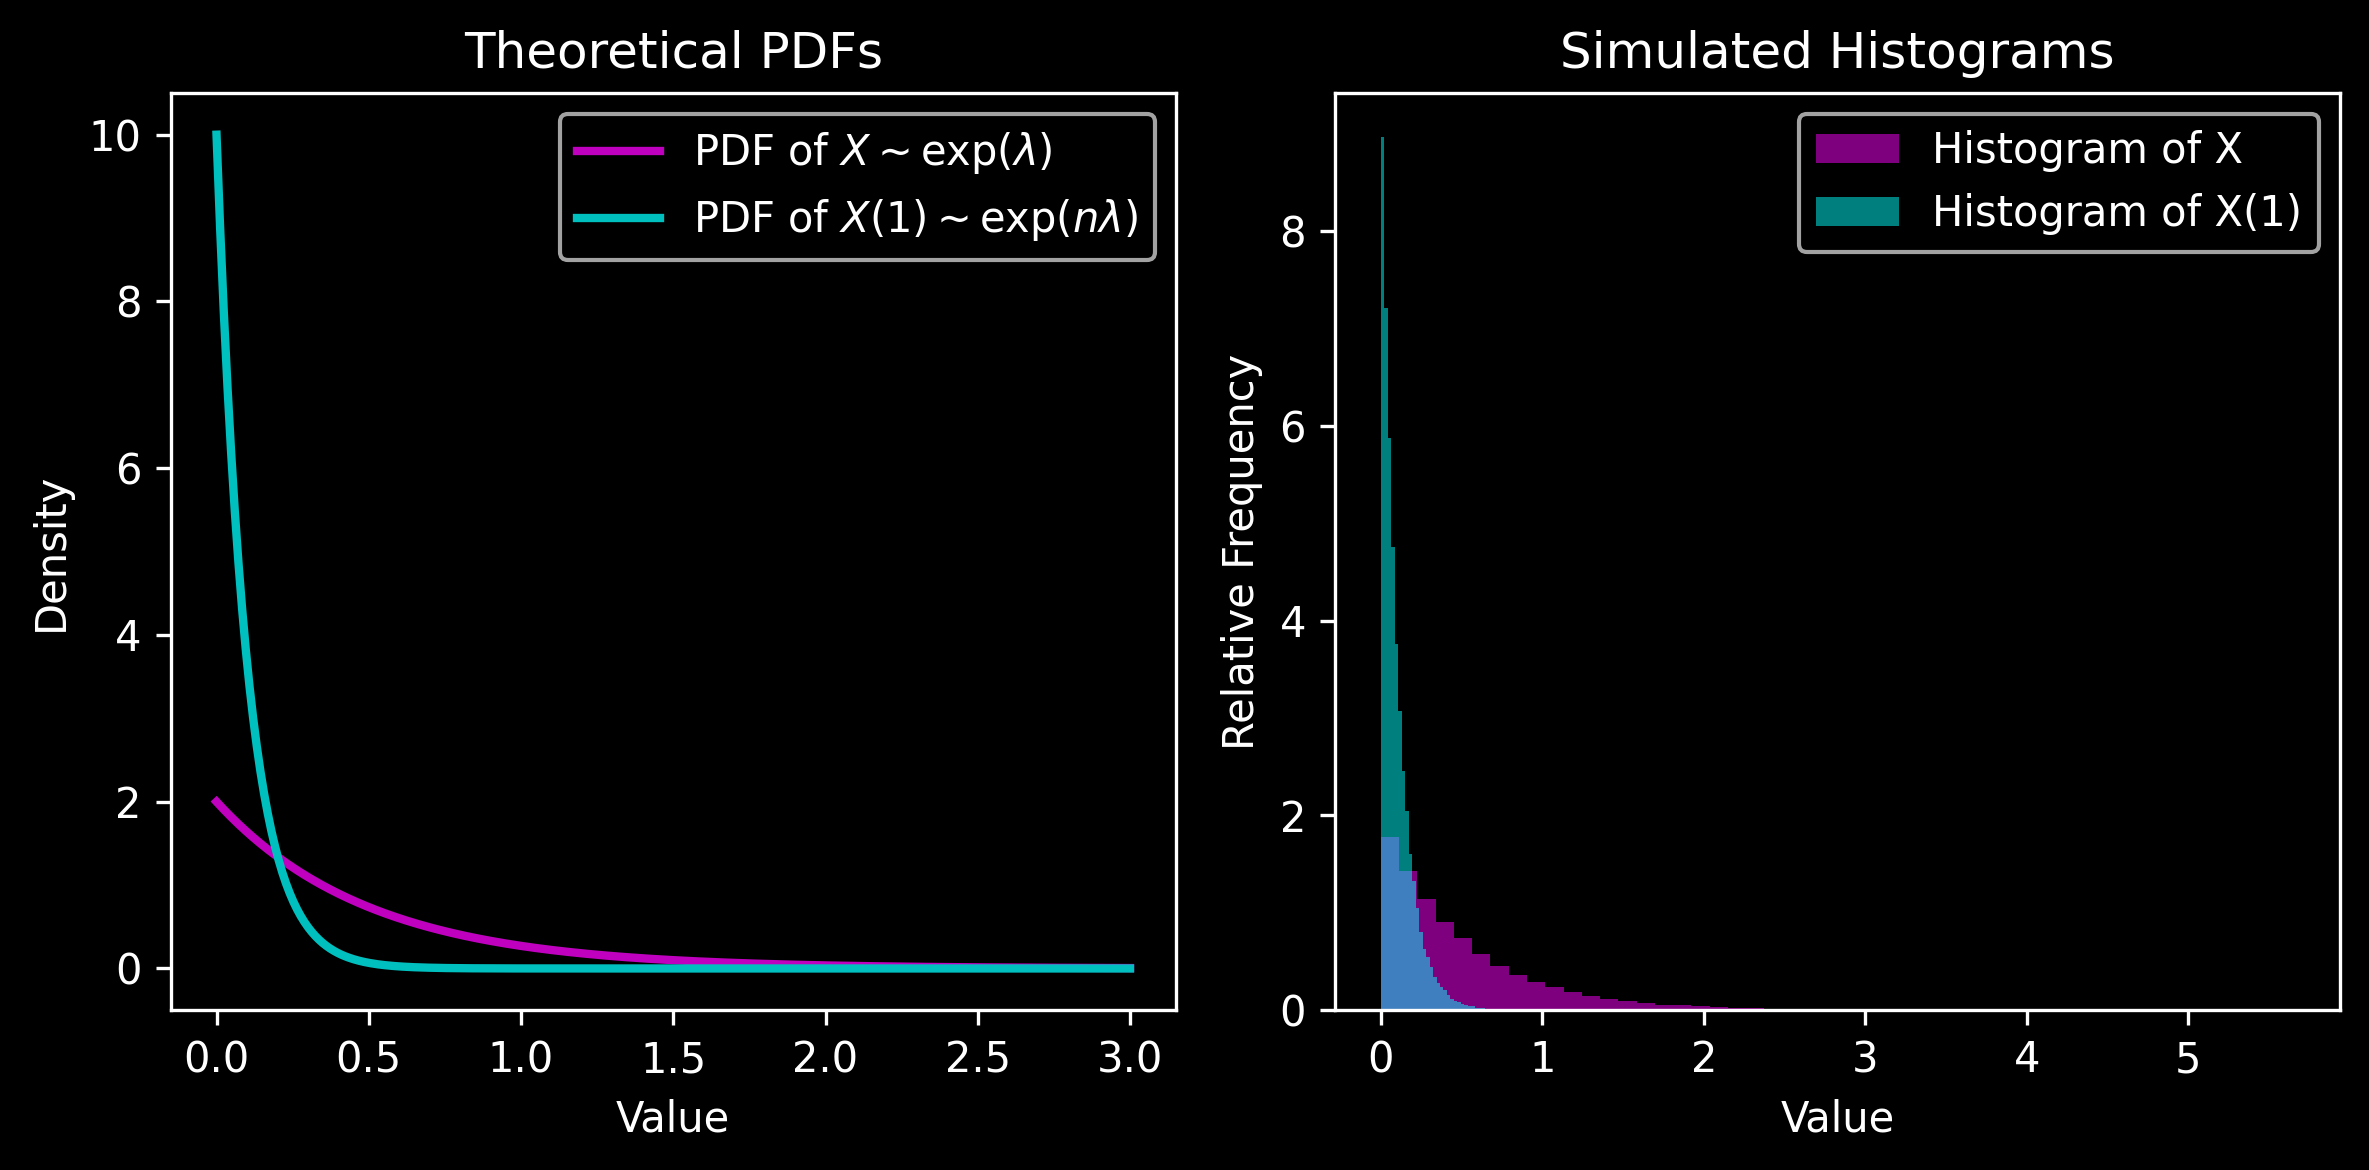

In [2]:
# Simulate X
x_samples = exp_dist.rvs(num_samples)

# Simulate X(1) as the minimum of n independent Exponentials
x_min_samples = np.min(exp_dist.rvs((num_samples, n)), axis=1)

# Theoretical PDFs
x = np.linspace(0, 3, 500)
x_pdf = exp_dist.pdf(x)  # PDF of X
x_min_pdf = exp_X_1_dist.pdf(x) # PDF of X(1)

fig, axes = plt.subplots(1, 2, figsize=(8, 4), 
                         sharey=False, dpi=300)

# Left: Theoretical PDFs
axes[0].plot(x, x_pdf, 'm-', 
             label="PDF of $X \sim \exp(\lambda)$", 
             linewidth=2)
axes[0].plot(x, x_min_pdf, 'c-', 
             label="PDF of $X(1) \sim \exp(n\lambda)$", 
             linewidth=2)
axes[0].set_title("Theoretical PDFs")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].legend()

# Right: Histograms (Simulated)
axes[1].hist(x_samples, bins=50, density=True, alpha=0.5, 
             color='magenta', label="Histogram of X")
axes[1].hist(x_min_samples, bins=50, density=True, alpha=0.5, 
             color='cyan', label="Histogram of X(1)")
axes[1].set_title("Simulated Histograms")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Relative Frequency")
axes[1].legend()

# Adjust layout and show
plt.tight_layout()
plt.show()

### Distribution of the Minimum $X_{(1)} = \min(X_1, X_2, \ldots, X_n)$

Let $X$ be a random variable and $X_1, X_2, ..., X_n$ be $n$ independent and identically distributed (IID) samples from the distribution of $X$. We are interested in finding the distribution of the minimum of these samples, denoted as $X_{(1)}$.

#### 1. **CDF of $X_{(1)}$:**

The cumulative distribution function (CDF) of $X_{(1)}$ is the probability that the minimum of the samples is less than or equal to a given value $x$.  We can derive it as follows:

$F_{X_{(1)}}(x) = P(X_{(1)} \leq x) = 1 - P(X_1 > x, X_2 > x, \ldots, X_n > x)$ 

Since the samples are independent, the probability that all of them are greater than $x$ is the product of the individual probabilities:

$P(X_1 > x, \ldots, X_n > x) = \prod_{i=1}^n P(X_i > x) = (1 - P(X_i \leq x))^n  = \left(1 - F_X(x)\right)^n$

Therefore, the CDF of $X_{(1)}$ is:

$F_{X_{(1)}}(x) = 1 - \left(1 - F_X(x)\right)^n$

---

#### 2. **PDF of $X_{(1)}$:**

The probability density function (PDF) of $X_{(1)}$ can be obtained by differentiating the CDF:

$f_{X_{(1)}}(x) = \frac{d}{dx} F_{X_{(1)}}(x) = n \left(1 - F_X(x)\right)^{n-1} f_X(x)$

---

#### 3. **Example: Exponential Distribution $X \sim \text{Exp}(\lambda)$:**

- CDF: $F_X(x) = 1 - e^{-\lambda x}$
- PDF: $f_X(x) = \lambda e^{-\lambda x}$

Substituting these into the generalized PDF of $X_{(1)}$, we get:

$f_{X_{(1)}}(x) = n \lambda e^{-\lambda x (n-1)} e^{-\lambda x} = n \lambda e^{-n \lambda x}$

---

#### **Result:**

If $X \sim \text{exp}(\lambda)$, then the minimum of $n$ IID samples from this distribution, $X_{(1)}$, also follows an exponential distribution ($X(1) \sim \text{exp}(n\lambda)$) but with parameter $n\lambda$